In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
oli = 'oligomers.dat' # Location of oligomers file
cmap = 'cMap.dat' #  and Contact matrix file
res = 'resNames.dat' # and Residues names file
df = 10 # Step time between frames in picoseconds
initF = 0 # This takes the first frame from the data like 0
finishF = None # Considering that the first frame from the date is 0 

In [3]:
oligoAll = np.loadtxt(oli)
contactMap = np.loadtxt(cmap)
resNames = np.loadtxt(res, dtype=str)

In [4]:
frames = oligoAll[:,0]
oligos = oligoAll[:,1:]

In [5]:
molecules = oligos.shape[1]
time = frames[initF:finishF]*10/1000 # In nanoseconds

In [6]:
totFrames = frames[initF:finishF].size

## Plot graphics

In [7]:
oligoSize = np.zeros(totFrames)
for i in range(totFrames):
    for j in range(molecules):
        if oligos[i][j] != 0:
            oligoSize[i] = j + 1

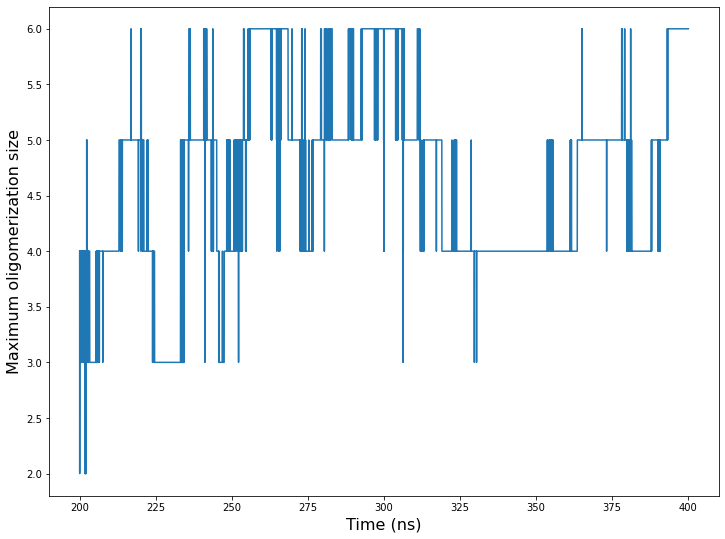

In [8]:
plt.figure(figsize = (12,9))

plt.xlabel('Time (ns)', fontsize = 16)
plt.ylabel('Maximum oligomerization size', fontsize = 16)
plt.plot(time, oligoSize)
#plt.savefig('oligoSize.pdf') # Other extensions: png, svg
plt.show()

In [9]:
window = 50 # Number of frames to average
ww = np.repeat(1/window, window)
oligoAve = np.convolve(oligoSize, ww, 'valid')

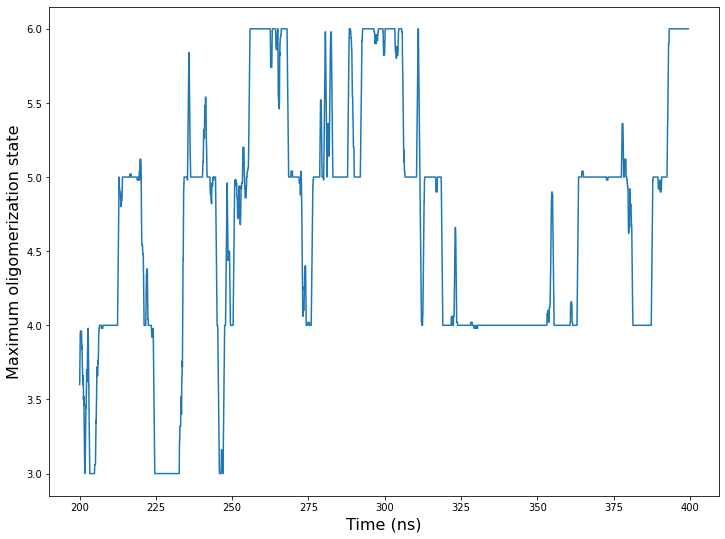

In [10]:
plt.figure(figsize = (12,9))

plt.xlabel('Time (ns)', fontsize = 16)
plt.ylabel('Maximum oligomerization state', fontsize = 16)
plt.plot(time[:oligoAve.size], oligoAve)
#plt.savefig('oligoSize_AVE.pdf') # Other extensions: png, svg
plt.show()

In [11]:
monomers = oligos[initF:finishF,0]

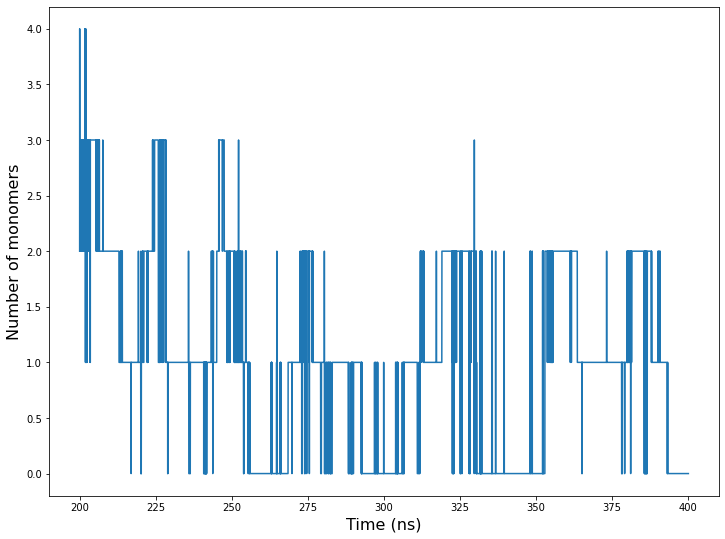

In [12]:
plt.figure(figsize = (12,9))

plt.xlabel('Time (ns)', fontsize = 16)
plt.ylabel('Number of monomers', fontsize = 16)
plt.plot(time, monomers)
#plt.savefig('monomers.pdf') # Other extensions: png, svg
plt.show()

In [13]:
window = 50 # Number of frames to average
ww = np.repeat(1/window, window)
monomersAve = np.convolve(monomers, ww, 'valid')

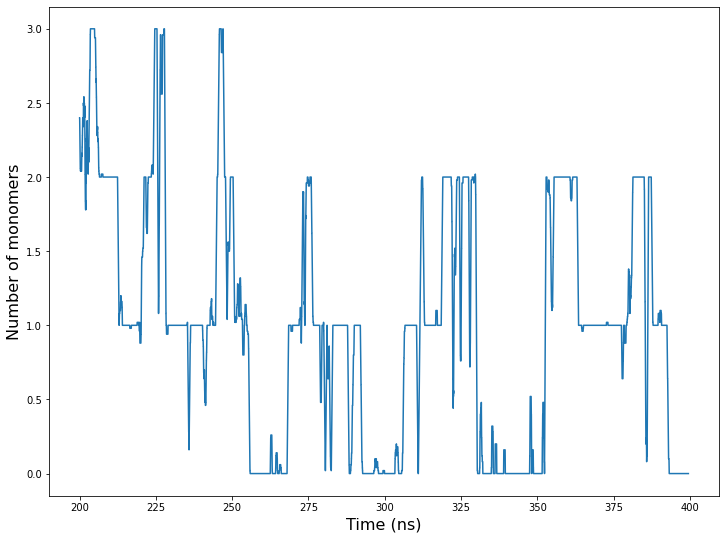

In [14]:
plt.figure(figsize = (12,9))

plt.xlabel('Time (ns)', fontsize = 16)
plt.ylabel('Number of monomers', fontsize = 16)
plt.plot(time[:oligoAve.size], monomersAve)
#plt.savefig('monomers.pdf') # Other extensions: png, svg
plt.show()

In [15]:
oligoHist = np.sum(oligos[initF:finishF], axis = 0)/np.sum(oligos[initF:finishF])

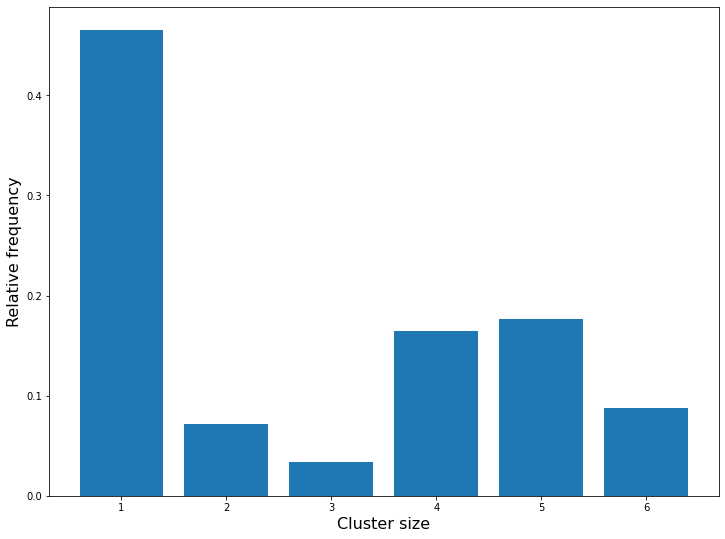

In [16]:
plt.figure(figsize = (12,9), facecolor = 'white')

plt.xlabel('Cluster size', fontsize = 16)
plt.ylabel('Relative frequency', fontsize = 16)
plt.bar(range(1,7), oligoHist)
#plt.savefig('oligoHistogram.pdf') # Other extensions: png, svg
plt.show()

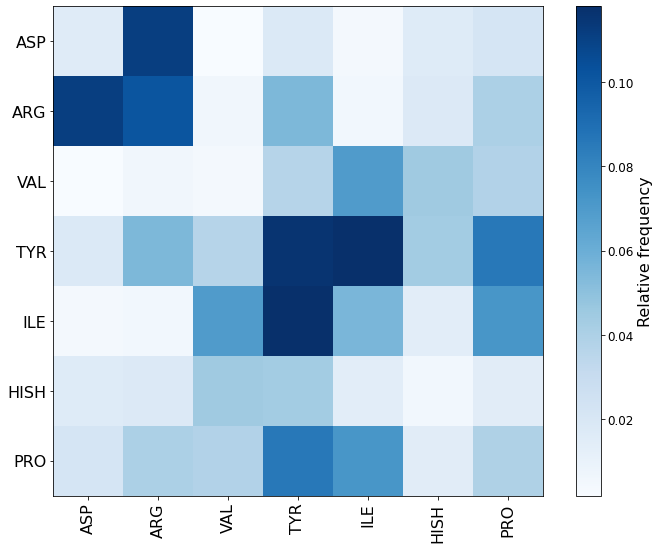

In [17]:
# This plot uses data calculated from the trajectory, and it will not chage if the init or finish frame is specified
plt.figure(figsize = (12,9))

ticks = range(resNames.size)

plt.xticks(list(ticks), labels = resNames, fontsize = 16, rotation = 'vertical')
plt.yticks(list(ticks), labels = resNames, fontsize = 16)
im = plt.imshow(contactMap, cmap = 'Blues')
cbar = plt.colorbar(im)
cbar.ax.tick_params(labelsize = 12)
cbar.set_label(label = 'Relative frequency', fontsize = 16)

plt.show()